# crime in cigao


## Group 7

**British University in Egypt**<br>
**Instructors:** Nahla Barakt <br>

In [1]:
import pandas as pd
import re
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
crime=pd.read_csv("Crimes_-_2001_to_Present.csv")
crime.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,9/5/2015 13:30,043XX S WOOD ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,2/10/2018 15:50,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,9/4/2015 11:30,008XX N CENTRAL AVE,870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,6,1138875.0,1904869.0,2015,2/10/2018 15:50,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,9/1/2018 0:01,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,6,NaN,NaN,2018,4/6/2019 16:04,NaN,NaN,NaN
3,10224740,HY411595,9/5/2015 12:45,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,2/10/2018 15:50,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,9/5/2015 13:00,0000X N LARAMIE AVE,560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,2/10/2018 15:50,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [3]:
socioeconomic=pd.read_csv("socioeconomic.csv")
socioeconomic.rename(columns = {'Community Area Number':'Community Area'}, inplace = True)
socioeconomic.head()

,Community Area,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [4]:
crime.shape

(1048575, 22)

In [5]:
crime.drop(labels=['IUCR', 'FBI Code','Ward','FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude'], axis=1,inplace=True)

In [6]:
crime.describe()

,ID,Beat,District,Community Area,Year
count,1.048575e+06,1.048575e+06,1.048574e+06,1.022381e+06,1.048575e+06
mean,1.071723e+07,1.145123e+03,1.120281e+01,3.677871e+01,2.016530e+03
std,1.580265e+06,6.956308e+02,6.945239e+00,2.138817e+01,2.786737e+00
min,1.007000e+03,1.110000e+02,1.000000e+00,1.000000e+00,2.001000e+03
25%,1.054158e+07,6.120000e+02,6.000000e+00,2.300000e+01,2.016000e+03
50%,1.096402e+07,1.031000e+03,1.000000e+01,3.200000e+01,2.017000e+03
75%,1.133600e+07,1.713000e+03,1.700000e+01,5.400000e+01,2.018000e+03
max,1.224939e+07,2.535000e+03,3.100000e+01,7.700000e+01,2.020000e+03


In [7]:
crime['Date'] = pd.to_datetime(crime['Date'])

In [8]:
crime.drop_duplicates()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Updated On,Location
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,61.0,2015,2/10/2018 15:50,"(41.815117282, -87.669999562)"
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,25.0,2015,2/10/2018 15:50,"(41.895080471, -87.765400451)"
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,44.0,2018,4/6/2019 16:04,NaN
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,21.0,2015,2/10/2018 15:50,"(41.937405765, -87.716649687)"
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,25.0,2015,2/10/2018 15:50,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1317710,G007687,2001-01-04 00:01:00,032XX N OAK PARK AV,THEFT,OVER $500,RESIDENCE,False,False,1632,16.0,NaN,2001,8/17/2015 15:03,"(41.939659188, -87.795905109)"
1048571,1317712,G003739,2001-01-02 18:00:00,047XX S DAMEN AV,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,CURRENCY EXCHANGE,False,False,915,9.0,NaN,2001,8/17/2015 15:03,"(41.80841993, -87.674539942)"
1048572,1317713,G006650,2001-01-04 02:45:00,061XX W ADDISON ST,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,1633,16.0,NaN,2001,8/17/2015 15:03,"(41.945848761, -87.779444043)"
1048573,1317714,G008142,2001-01-04 18:20:00,042XX W TAYLOR ST,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1132,11.0,NaN,2001,8/17/2015 15:03,"(41.869138432, -87.730284897)"


In [9]:
crime.drop(labels=['Updated On'], axis=1,inplace=True)

In [10]:
crime = crime.astype({"Date": str})

In [11]:
crime['time']=crime['Date'].str.extract(r'( [0-9][0-9])')
crime.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,Location,time
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,61.0,2015,"(41.815117282, -87.669999562)",13
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,25.0,2015,"(41.895080471, -87.765400451)",11
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,44.0,2018,NaN,00
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,21.0,2015,"(41.937405765, -87.716649687)",12
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,25.0,2015,"(41.881903443, -87.755121152)",13


In [12]:
crime['Date'] = pd.to_datetime(crime['Date'])

In [13]:
crime["time"] = pd.to_numeric(crime["time"])

In [14]:
crime.isna().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
Primary Type                0
Description                 0
Location Description     3122
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Community Area          26194
Year                        0
Location                 5130
time                        0
dtype: int64

In [15]:
crime.dropna(subset=["Community Area"],inplace=True)
crime.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
Primary Type               0
Description                0
Location Description    3122
Arrest                     0
Domestic                   0
Beat                       0
District                   1
Community Area             0
Year                       0
Location                4506
time                       0
dtype: int64

In [16]:
crime.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Community Area                 float64
Year                             int64
Location                        object
time                             int64
dtype: object

In [17]:
crime.drop(labels=['Location'], axis=1,inplace=True)

In [18]:
crime.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year,time
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,61.0,2015,13
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,25.0,2015,11
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,44.0,2018,0
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,21.0,2015,12
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,25.0,2015,13


In [19]:
crime=pd.get_dummies(crime, columns=['Arrest'])
crime.describe

<bound method NDFrame.describe of                ID Case Number                Date                   Block  \
0        10224738    HY411648 2015-09-05 13:30:00         043XX S WOOD ST   
1        10224739    HY411615 2015-09-04 11:30:00     008XX N CENTRAL AVE   
2        11646166    JC213529 2018-09-01 00:01:00   082XX S INGLESIDE AVE   
3        10224740    HY411595 2015-09-05 12:45:00       035XX W BARRY AVE   
4        10224741    HY411610 2015-09-05 13:00:00     0000X N LARAMIE AVE   
...           ...         ...                 ...                     ...   
1048367   2140239    HH373791 2002-05-15 14:35:00        009XX E 133RD PL   
1048394  10070330    HY258889 2015-05-12 17:58:00         007XX E 87TH ST   
1048419  11870478    JC484252 2019-10-24 01:56:00     042XX W GRENSHAW ST   
1048555   2140487    HH385096 2002-05-20 19:14:00     038XX W BELMONT AVE   
1048556  10048016    HY237431 2015-04-25 21:30:00  079XX S SOUTH SHORE DR   

                Primary Type             

In [20]:
crime.head(2)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Domestic,Beat,District,Community Area,Year,time,Arrest_False,Arrest_True
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,924,9.0,61.0,2015,13,1,0
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,1511,15.0,25.0,2015,11,1,0


In [21]:
crime.rename(columns = {'Arrest_False':'Not Arrested', 'Arrest_True':'Arrested'}, inplace = True)

In [22]:
list = crime["Primary Type"].unique()
list

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION', 'HOMICIDE',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [23]:
crime.sort_values(by=['Community Area'])
crime_by_Community = crime.groupby('Community Area')
crime_by_Community.head()

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Domestic,Beat,District,Community Area,Year,time,Not Arrested,Arrested
0,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,924,9.0,61.0,2015,13,1,0
1,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,THEFT,POCKET-PICKING,CTA BUS,False,1511,15.0,25.0,2015,11,1,0
2,11646166,JC213529,2018-09-01 00:01:00,082XX S INGLESIDE AVE,THEFT,OVER $500,RESIDENCE,True,631,6.0,44.0,2018,0,1,0
3,10224740,HY411595,2015-09-05 12:45:00,035XX W BARRY AVE,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,False,1412,14.0,21.0,2015,12,0,1
4,10224741,HY411610,2015-09-05 13:00:00,0000X N LARAMIE AVE,ASSAULT,SIMPLE,APARTMENT,True,1522,15.0,25.0,2015,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,10232270,HY419955,2015-09-12 00:08:00,009XX E 91ST ST,DECEPTIVE PRACTICE,THEFT OF LOST/MISLAID PROP,STREET,False,413,4.0,47.0,2015,0,0,1
5972,10233241,HY420389,2015-09-12 11:30:00,032XX E 136TH ST,ASSAULT,SIMPLE,RESIDENCE,True,433,4.0,55.0,2015,11,1,0
6466,11231425,JB153065,2017-12-12 11:30:00,132XX S BALTIMORE AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,433,4.0,55.0,2017,11,1,0
6881,10234689,HY422713,2015-09-12 08:00:00,034XX E 118TH ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,433,4.0,55.0,2015,8,1,0


In [24]:
crime["Community Area"].unique()

array([61., 25., 44., 21., 71., 24., 31., 27., 63., 65., 11., 49., 39.,
       51., 15., 52., 12., 43., 46., 32., 68., 14., 29.,  2., 69., 23.,
       35.,  8.,  3.,  6., 56., 28., 53., 50., 33., 13., 74., 19., 45.,
       72., 22., 64.,  7.,  5., 26., 66., 59., 77.,  1., 10., 67., 38.,
       41., 60., 30., 54., 58., 48., 73., 70., 40., 34., 16., 18.,  4.,
       17., 42., 37., 75., 62., 20., 57., 76., 47.,  9., 36., 55.])

<AxesSubplot:>

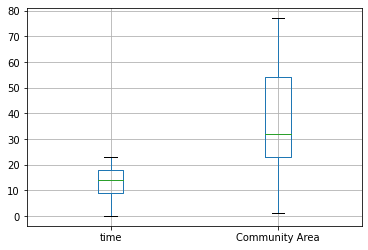

In [25]:
crime.boxplot(column=['time','Community Area'])

<AxesSubplot:>

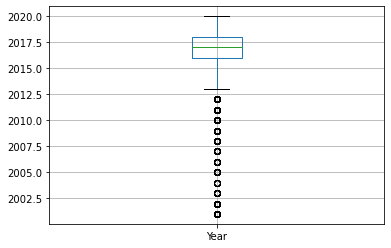

In [26]:
crime.boxplot(column=['Year'])


**There are no outliers in the dataset**<br>


In [27]:
crime_by_year = crime.groupby('Primary Type').aggregate({'time': 'mean','Arrested':'sum'})
crime_by_year.head(50)

,time,Arrested
Primary Type,,
ARSON,10.583080,163.0
ASSAULT,13.558609,13484.0
BATTERY,12.755721,40028.0
BURGLARY,12.002131,2420.0
CONCEALED CARRY LICENSE VIOLATION,12.886628,331.0
CRIM SEXUAL ASSAULT,10.301234,468.0
CRIMINAL DAMAGE,12.966688,6607.0
CRIMINAL SEXUAL ASSAULT,10.111801,13.0
CRIMINAL TRESPASS,13.439557,15175.0


In [28]:
crime_by_year = crime.groupby('Year').aggregate({'Not Arrested': 'sum','Arrested':'sum'})
crime_by_year.head(50)

,Not Arrested,Arrested
Year,,
2001,152.0,141.0
2002,84.0,53.0
2003,14.0,1.0
2004,5.0,2.0
2005,24.0,4.0
2006,23.0,3.0
2007,28.0,2.0
2008,52.0,4.0
2009,64.0,14.0


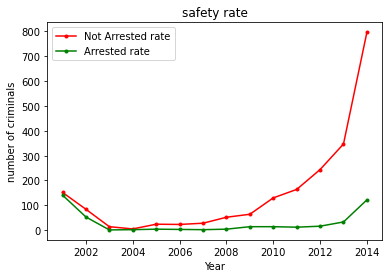

In [29]:
plt.title("safety rate")
plt.plot(crime_by_year.loc[2001:2014].index,crime_by_year.loc[2001:2014]["Not Arrested"],"r.-",label = "Not Arrested rate")
plt.plot(crime_by_year.loc[2001:2014].index,crime_by_year.loc[2001:2014]["Arrested"],"g.-",label = "Arrested rate")
plt.legend()
plt.xlabel('Year')
plt.ylabel('number of criminals')
plt.show()

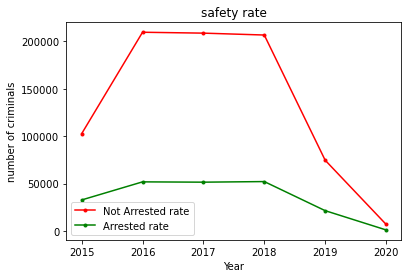

In [30]:
plt.title("safety rate")
plt.plot(crime_by_year.loc[2015:].index,crime_by_year.loc[2015:]["Not Arrested"],"r.-",label = "Not Arrested rate")
plt.plot(crime_by_year.loc[2015:].index,crime_by_year.loc[2015:]["Arrested"],"g.-",label = "Arrested rate")
plt.legend()
plt.xlabel('Year')
plt.ylabel('number of criminals')
plt.show()

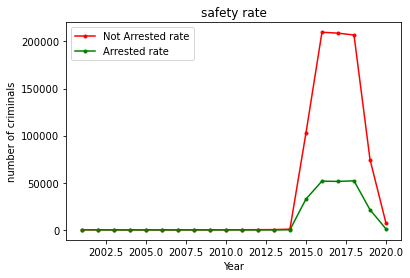

In [31]:
plt.title("safety rate")
plt.plot(crime_by_year.index,crime_by_year["Not Arrested"],"r.-",label = "Not Arrested rate")
plt.plot(crime_by_year.index,crime_by_year["Arrested"],"g.-",label = "Arrested rate")
plt.legend()
plt.xlabel('Year')
plt.ylabel('number of criminals')
plt.show()

 عصام اكتب الشرح هنا-----------------> ...........................

In [32]:
crime_Type_location_Time = crime[['Primary Type','Location Description','time']]
#crime_Type_location_Time =pd.get_dummies(crime_Type_location_Time, columns=['Location Description'])


crime_Type_location_Time = crime_Type_location_Time.groupby('Primary Type').aggregate({'time':'mean' })


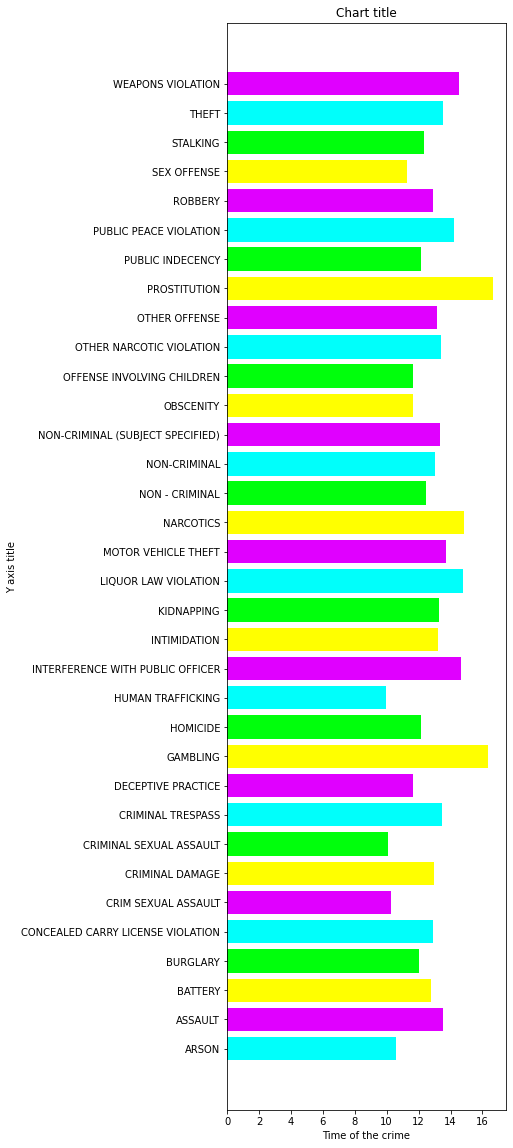

In [53]:
plt.barh(crime_Type_location_Time.index,crime_Type_location_Time['time'],color = ['#00FFFB','#E000FF','#FFFF00','#00FF0C']) 
plt.title('Chart title')
plt.xlabel('Time of the crime')
plt.ylabel('Y axis title') 
plt.rcParams["figure.figsize"] = (5,20)
#Show the plot
plt.show()

 عصام اكتب الشرح هنا-----------------> ...........................


In [34]:
robbery={'robbery_USA': [423.557,
420.806,
414.235,
401.470,
417.438,
449.246,
447.324,
443.563,
408.742,
369.089,
354.746,
355.051,
345.031],
'Year':[2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,]
}

In [35]:
robbery_df=pd.DataFrame(robbery)

In [36]:
robbery_df

,robbery_USA,Year
0,423.557,2001
1,420.806,2002
2,414.235,2003
3,401.470,2004
4,417.438,2005
5,449.246,2006
6,447.324,2007
7,443.563,2008
8,408.742,2009
9,369.089,2010


In [40]:
crime_new=pd.merge(crime,robbery_df,on="Year")

In [42]:
crime_new.head(200)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Domestic,Beat,District,Community Area,Year,time,Not Arrested,Arrested,robbery_USA
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,412,4.0,45.0,2001,11,1,0,423.557
1,1023,G501252,2001-08-22 17:15:00,051XX W WASHINGTON BLVD,HOMICIDE,FIRST DEGREE MURDER,STREET,False,1533,15.0,25.0,2001,17,0,1,423.557
2,11231026,JB152500,2001-01-01 00:00:00,050XX N ASHLAND AVE,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,2032,20.0,3.0,2001,0,1,0,423.557
3,1024,G500180,2001-08-22 07:00:00,075XX S HALSTED ST,HOMICIDE,FIRST DEGREE MURDER,VACANT LOT,False,621,6.0,71.0,2001,7,1,0,423.557
4,1025,G501811,2001-08-22 20:30:00,059XX W WASHINGTON BLVD,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,1512,15.0,25.0,2001,20,1,0,423.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1361470,G065355,2001-02-01 03:05:00,100XX W OHARE ST,CRIMINAL TRESPASS,TO LAND,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,3,0,1,423.557
196,1362460,G068246,2001-01-10 18:45:00,100XX W OHARE ST,THEFT,OVER $500,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,18,1,0,423.557
197,1362817,G067536,2001-02-02 09:00:00,100XX W OHARE ST,CRIMINAL TRESPASS,TO LAND,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,9,0,1,423.557
198,1362832,G067359,2001-02-02 06:00:00,100XX W OHARE ST,ASSAULT,SIMPLE,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,6,0,1,423.557


In [43]:
crime_new.head(200)

,ID,Case Number,Date,Block,Primary Type,Description,Location Description,Domestic,Beat,District,Community Area,Year,time,Not Arrested,Arrested,robbery_USA
0,11034701,JA366925,2001-01-01 11:00:00,016XX E 86TH PL,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,412,4.0,45.0,2001,11,1,0,423.557
1,1023,G501252,2001-08-22 17:15:00,051XX W WASHINGTON BLVD,HOMICIDE,FIRST DEGREE MURDER,STREET,False,1533,15.0,25.0,2001,17,0,1,423.557
2,11231026,JB152500,2001-01-01 00:00:00,050XX N ASHLAND AVE,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,2032,20.0,3.0,2001,0,1,0,423.557
3,1024,G500180,2001-08-22 07:00:00,075XX S HALSTED ST,HOMICIDE,FIRST DEGREE MURDER,VACANT LOT,False,621,6.0,71.0,2001,7,1,0,423.557
4,1025,G501811,2001-08-22 20:30:00,059XX W WASHINGTON BLVD,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,1512,15.0,25.0,2001,20,1,0,423.557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1361470,G065355,2001-02-01 03:05:00,100XX W OHARE ST,CRIMINAL TRESPASS,TO LAND,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,3,0,1,423.557
196,1362460,G068246,2001-01-10 18:45:00,100XX W OHARE ST,THEFT,OVER $500,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,18,1,0,423.557
197,1362817,G067536,2001-02-02 09:00:00,100XX W OHARE ST,CRIMINAL TRESPASS,TO LAND,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,9,0,1,423.557
198,1362832,G067359,2001-02-02 06:00:00,100XX W OHARE ST,ASSAULT,SIMPLE,AIRPORT/AIRCRAFT,False,1651,16.0,76.0,2001,6,0,1,423.557


0